# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Lists for holding variables
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Set counter for city number
count = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {count} | {city}") 
        
        count += 1
   
    except:
        print(f"City not found. Skipping...")
        continue
print("-"*40)
print(f"Data Retrieval Complete")   
print("-"*40)

Beginning Data Retrieval 
-----------------------------
Processing Record 1 | barrow
Processing Record 2 | vila
Processing Record 3 | cape town
Processing Record 4 | katsuura
Processing Record 5 | jamestown
Processing Record 6 | nantucket
City not found. Skipping...
Processing Record 7 | camargo
Processing Record 8 | dikson
Processing Record 9 | jaisalmer
Processing Record 10 | meulaboh
Processing Record 11 | husavik
Processing Record 12 | sangar
Processing Record 13 | busselton
Processing Record 14 | caravelas
Processing Record 15 | bluff
Processing Record 16 | nome
Processing Record 17 | ushuaia
Processing Record 18 | rio grande
Processing Record 19 | hobart
Processing Record 20 | rikitea
Processing Record 21 | mount gambier
Processing Record 22 | san cristobal
Processing Record 23 | preston
Processing Record 24 | mar del plata
Processing Record 25 | prainha
Processing Record 26 | boddam
Processing Record 27 | hilo
Processing Record 28 | cairns
Processing Record 29 | grindavik
City n

City not found. Skipping...
Processing Record 230 | tasiilaq
Processing Record 231 | ahipara
Processing Record 232 | buraydah
Processing Record 233 | altay
Processing Record 234 | hofn
Processing Record 235 | sao joao da barra
Processing Record 236 | zhigansk
Processing Record 237 | port blair
City not found. Skipping...
Processing Record 238 | bambous virieux
City not found. Skipping...
Processing Record 239 | medina
Processing Record 240 | pangnirtung
Processing Record 241 | bhadrachalam
Processing Record 242 | saint-francois
Processing Record 243 | buala
Processing Record 244 | coquimbo
Processing Record 245 | ambulu
Processing Record 246 | kungurtug
Processing Record 247 | beringovskiy
Processing Record 248 | druzhba
Processing Record 249 | broken hill
City not found. Skipping...
Processing Record 250 | rey bouba
Processing Record 251 | avarua
Processing Record 252 | lac du bonnet
City not found. Skipping...
Processing Record 253 | kaeo
Processing Record 254 | ambilobe
Processing R

Processing Record 460 | saint-augustin
Processing Record 461 | hit
Processing Record 462 | olinda
Processing Record 463 | half moon bay
Processing Record 464 | mariental
Processing Record 465 | bandarbeyla
Processing Record 466 | ouro preto
Processing Record 467 | kholm
City not found. Skipping...
Processing Record 468 | glendive
Processing Record 469 | pathein
Processing Record 470 | tilichiki
Processing Record 471 | waipawa
Processing Record 472 | manokwari
Processing Record 473 | shenjiamen
Processing Record 474 | kuala terengganu
Processing Record 475 | huntington
Processing Record 476 | lukovetskiy
Processing Record 477 | cabudare
Processing Record 478 | karratha
Processing Record 479 | geraldton
Processing Record 480 | lasa
City not found. Skipping...
Processing Record 481 | udachnyy
Processing Record 482 | owando
Processing Record 483 | zirandaro
Processing Record 484 | moranbah
Processing Record 485 | nuuk
Processing Record 486 | simao
Processing Record 487 | havoysund
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
# Create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

city_data = pd.DataFrame(weather_dict)

# Save data frame to CSV
city_data.to_csv("cities.csv")

city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.29,-156.79,24.80,92,75,6.93,US,1603218467
1,Vila,42.03,-8.16,55.00,94,100,3.96,PT,1603218467
2,Cape Town,-33.93,18.42,60.01,67,0,13.87,ZA,1603218407
3,Katsuura,35.13,140.30,60.80,77,20,13.87,JP,1603218467
4,Jamestown,42.10,-79.24,50.00,100,90,6.93,US,1603218350


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,20.968510,18.667894,61.128579,69.856164,52.356164,7.846798,1.603218e+09
std,33.147375,90.167824,21.423010,23.363190,37.925265,5.449539,7.061347e+01
min,-54.800000,-179.170000,7.830000,1.000000,0.000000,0.200000,1.603218e+09
25%,-3.777500,-59.807500,45.600000,57.750000,15.000000,3.500000,1.603218e+09
50%,24.860000,22.880000,64.805000,76.000000,58.500000,6.870000,1.603219e+09
75%,49.640000,97.867500,78.090000,88.000000,90.000000,10.667500,1.603219e+09
max,78.220000,179.320000,102.650000,100.000000,100.000000,30.650000,1.603219e+09


In [48]:
#  Get the indices of cities that have humidity over 100%.
print(city_data.loc[city_data.Humidity >100].index)
print(city_data["Humidity"].max())

# Output shows not cities with humidity over 100.

Int64Index([], dtype='int64')
100


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


#N/A

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

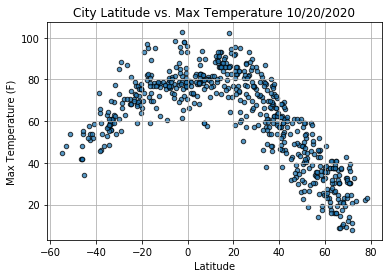

In [52]:
# Set today's date for chart title
date = dt.date.today().strftime("%m/%d/%Y")

# Create Latitude vs. Temperature scatter plot
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o",s = 20, alpha = .75, edgecolors = "black")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save graph
plt.savefig("City Latitude vs Max Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

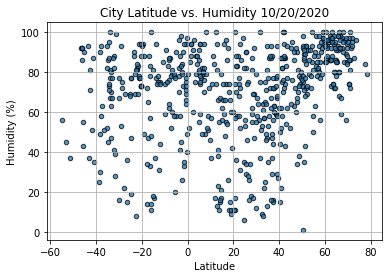

In [53]:
# Set today's date for chart title
date = dt.date.today().strftime("%m/%d/%Y")

# Create Latitude vs. Humidity scatter plot
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o",s = 20, alpha = .75, edgecolors = "black")
plt.title(f"City Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save graph
plt.savefig("City Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

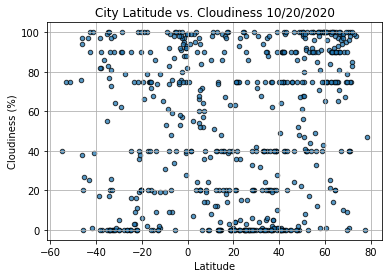

In [54]:
# Set today's date for chart title
date = dt.date.today().strftime("%m/%d/%Y")

# Create Latitude vs. Cloudiness scatter plot
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o",s = 20, alpha = .75, edgecolors = "black")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save graph
plt.savefig("City Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

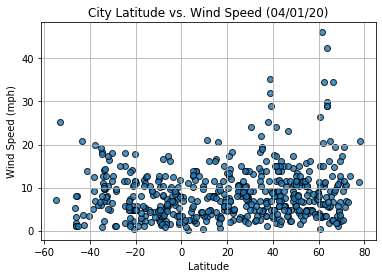

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


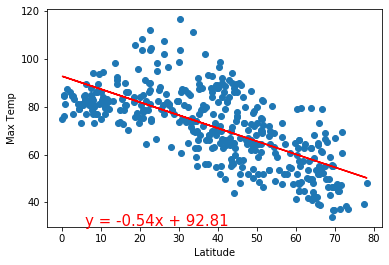

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


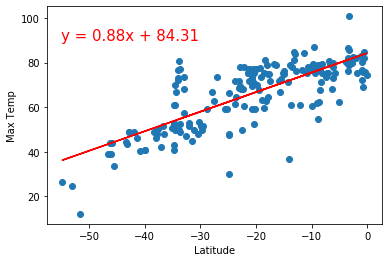

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


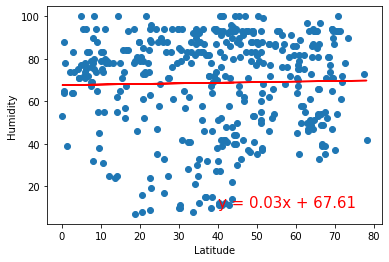

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


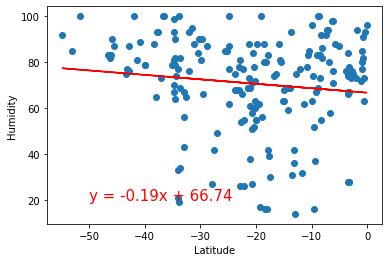

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


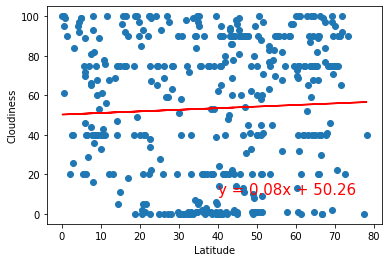

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


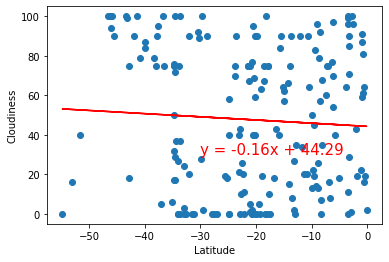

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


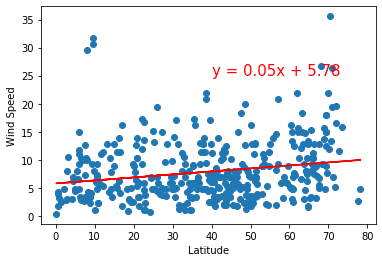

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


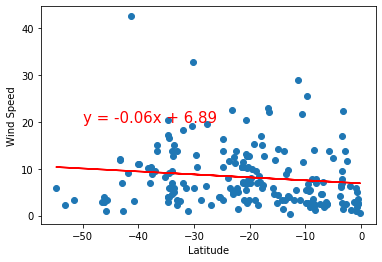